In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
palette={"MANGA": "#7986cb", "MANHUA": "#8d6e63", "MANHWA": "#81c784"}

In [4]:
dataset_df = pd.read_csv("../data/raw/dataset_4.csv", index_col="Unnamed: 0")
print(len(dataset_df))

19039


Se utiliza la función dataset_df.describe() para mostrar un resumen estadístico del conjunto de datos. Esto incluye información como la cuenta de filas, la media, la desviación estándar, los valores mínimo y máximo, y los percentiles de las columnas numéricas.

In [5]:
dataset_df.describe()

,score,read,pending,following,favorite,have,abandoned
count,19039.000000,19039.000000,19039.000000,19039.000000,19039.000000,19039.000000,19039.000000
mean,6.320739,1381.689900,2003.844320,3948.597563,1035.377961,419.700930,247.333053
std,3.806957,2775.152915,3031.309175,7954.802081,2542.668126,770.357712,446.928328
min,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,134.000000,367.000000,418.000000,54.000000,33.000000,25.000000
50%,8.270000,485.000000,911.000000,1200.000000,225.000000,122.000000,77.000000
75%,9.000000,1500.000000,2300.000000,3800.000000,940.000000,453.000000,252.000000
max,10.000000,97500.000000,42700.000000,137900.000000,68100.000000,11300.000000,7000.000000


Se utiliza la función dataset_df.info() para mostrar información detallada sobre el conjunto de datos. Esto incluye el tipo de datos de cada columna y la cantidad de valores no nulos. Esta información es útil para comprender la estructura y la calidad de los datos.

In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19039 entries, 0 to 19072
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   synopsis              19038 non-null  object 
 1   demography            19039 non-null  object 
 2   type                  19039 non-null  object 
 3   name                  19039 non-null  object 
 4   genre                 18954 non-null  object 
 5   score                 19039 non-null  float64
 6   book_status           19039 non-null  object 
 7   book_cover            19039 non-null  object 
 8   read                  19039 non-null  float64
 9   pending               19039 non-null  float64
 10  following             19039 non-null  float64
 11  favorite              19039 non-null  float64
 12  have                  19039 non-null  float64
 13  abandoned             19039 non-null  float64
 14  uuid                  19039 non-null  object 
 15  Magia              

### By Type

<Figure size 640x480 with 0 Axes>

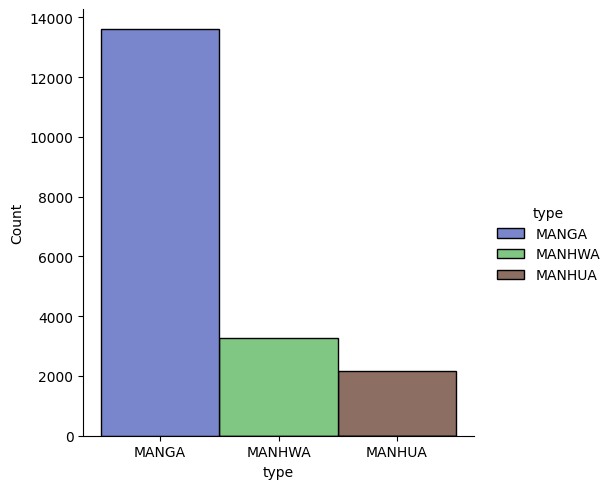

In [7]:
plt.figure()
sns_displot = sns.displot(data=dataset_df,
            x=dataset_df["type"],
            kde=False,
            hue=dataset_df["type"],
            palette=palette,
            alpha=1);

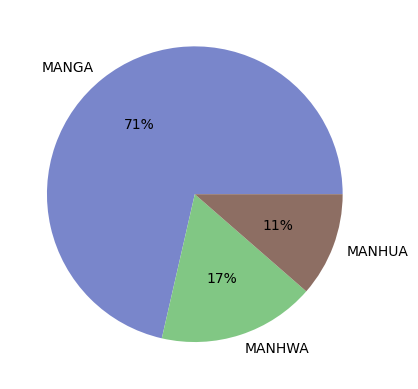

In [8]:
fig_pie = plt.figure()
plt.pie(dataset_df["type"].value_counts(), labels=dataset_df["type"].unique(), autopct='%.0f%%', colors=["#7986cb", "#81c784", "#8d6e63"]);

### By Demography

In [9]:
josei_df = dataset_df[dataset_df["demography"] == "Josei"]
seinen_df = dataset_df[dataset_df["demography"] == "Seinen"]
shoujo_df = dataset_df[dataset_df["demography"] == "Shoujo"]
shounen_df = dataset_df[dataset_df["demography"] == "Shounen"]
kodomo_df = dataset_df[dataset_df["demography"] == "Kodomo"]

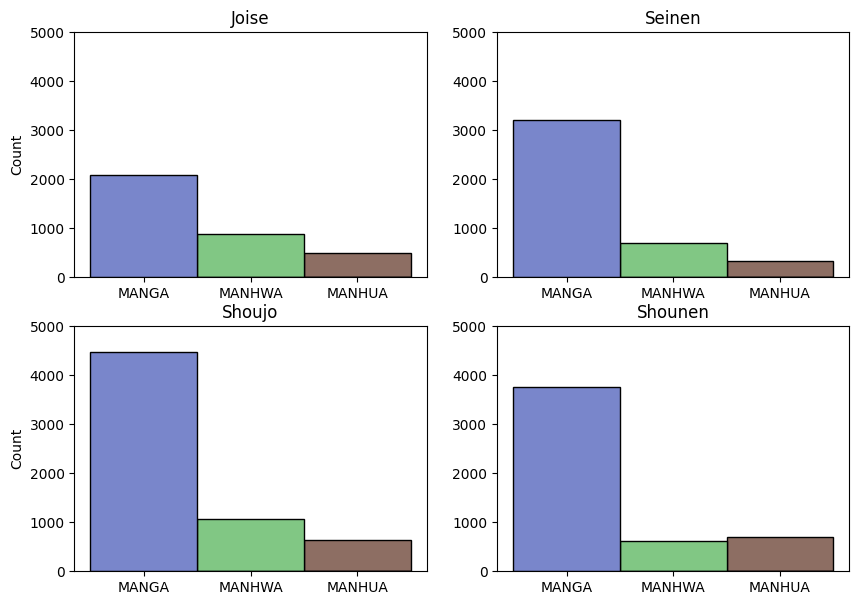

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.histplot(data=josei_df,
            x=josei_df["type"],
            kde=False,
            hue=josei_df["type"],
            palette=palette,
            alpha=1, 
            legend=False,
            ax=axes[0, 0]).set(title="Joise", xlabel=None, ylim=(0, 5000))
sns.histplot(data=seinen_df,
            x=seinen_df["type"],
            kde=False,
            hue=seinen_df["type"],
            palette=palette,
            legend=False,
            alpha=1,
            ax=axes[0, 1]).set(title="Seinen", xlabel=None, ylabel=None, ylim=(0, 5000))
sns.histplot(data=shoujo_df,
            x=shoujo_df["type"],
            kde=False,
            hue=shoujo_df["type"],
            palette=palette,
            alpha=1,
            legend=False,
            ax=axes[1, 0]).set(title="Shoujo", xlabel=None, ylim=(0, 5000))
sns.histplot(data=shounen_df,
            x=shounen_df["type"],
            kde=False,
            hue=shounen_df["type"],
            palette=palette,
            alpha=1,
            legend=False,
            ax=axes[1, 1]).set(title="Shounen", xlabel=None, ylabel=None, ylim=(0, 5000));


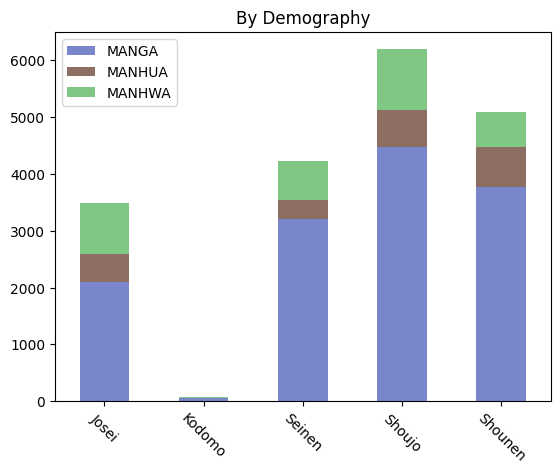

In [22]:
df_plot = dataset_df.groupby(['type', 'demography']).size().reset_index().pivot(columns='type',
                                                                                  index='demography',
                                                                                  values=0)
plot = df_plot.plot(kind='bar', stacked=True, color=palette)
plot.set(title="By Demography", xlabel=None)
plt.legend(loc=2)
plt.xticks(rotation=-45, fontsize=10);

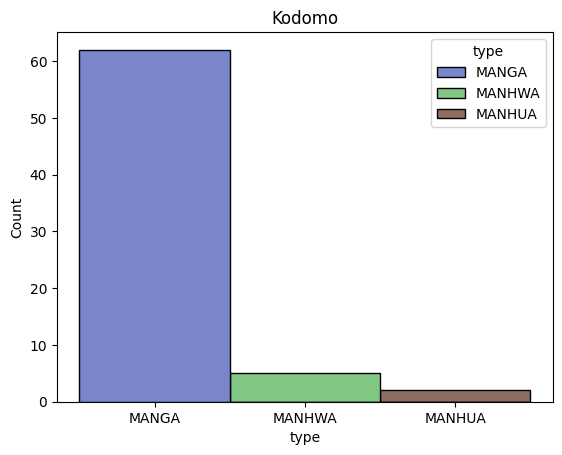

In [13]:
sns.histplot(data=kodomo_df,
            x=kodomo_df["type"],
            kde=False,
            hue=kodomo_df["type"],
            palette=palette,
            alpha=1,).set(title="Kodomo");

### By Score

In [14]:
score_df = dataset_df[['type','score','read','pending','following','favorite','have', 'abandoned']]

In [15]:
score_group_df = score_df.groupby("type")

In [16]:
score_group_mean_df = score_group_df.mean()
score_group_median_df = score_group_df.median()
score_group_median_df

,score,read,pending,following,favorite,have,abandoned
type,,,,,,,
MANGA,8.35,505.0,772.0,982.0,155.0,83.0,56.0
MANHUA,6.00,315.5,1200.0,2000.0,492.0,252.5,168.5
MANHWA,8.03,577.5,1900.0,2700.0,702.5,402.5,239.5


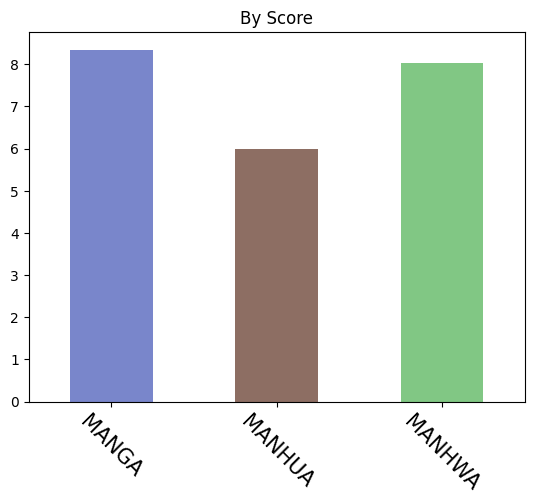

In [17]:
plot = score_group_median_df["score"].plot(kind="bar", color=["#7986cb", "#8d6e63", "#81c784"])
plot.set(title="By Score", xlabel=None)
plt.xticks(rotation=-45, fontsize=15);

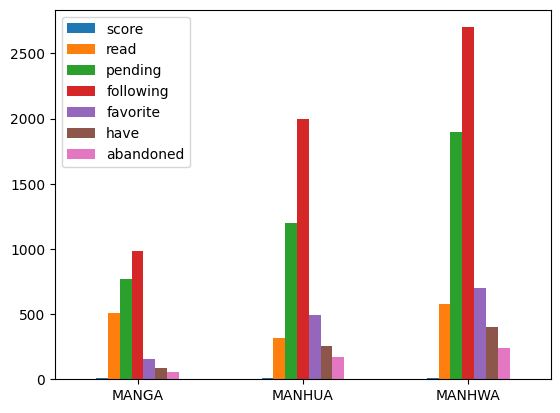

In [25]:
plot = score_group_median_df.plot(kind="bar")
plot.set(xlabel=None)
plot.plot(figsize=(8,5));
plt.xticks(rotation=0, fontsize=10);

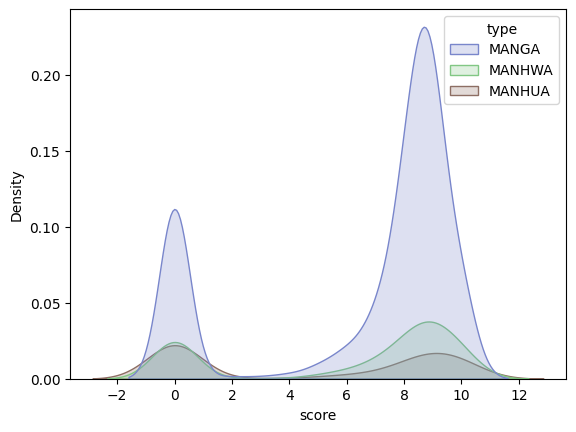

In [19]:
sns_kdeplot = plt.figure()
sns.kdeplot(data=score_df, x='score', fill=True, hue="type", palette=palette);

In [20]:
score_corr_df = score_df[['score','read','pending','following','favorite','have', 'abandoned']]

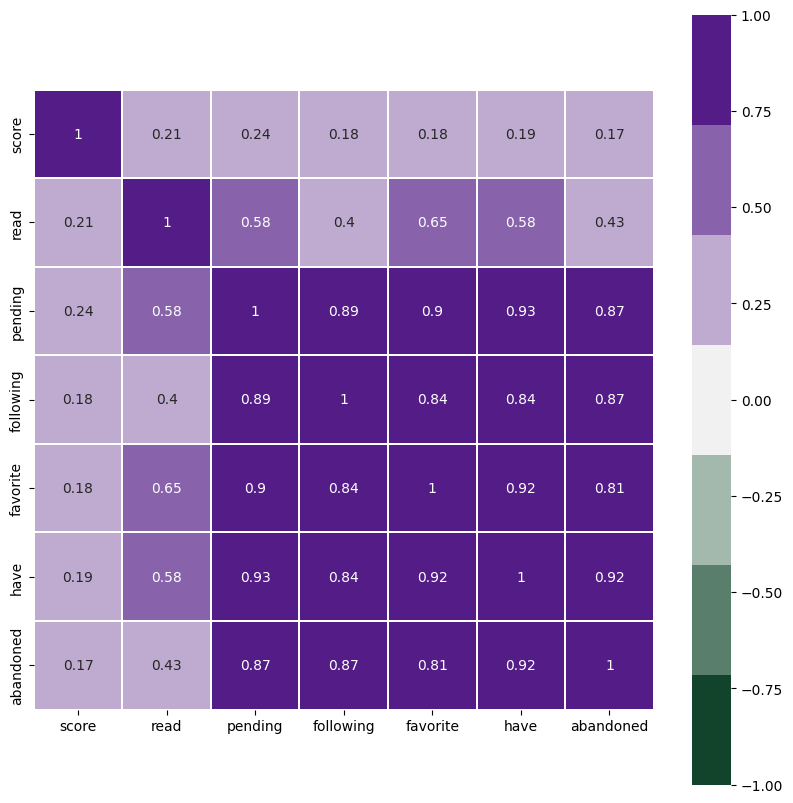

In [21]:
sns_heatmap = plt.figure(figsize=(10,10))
sns.heatmap(score_corr_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);